In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path

Maybe we should find another way to reduce the amoung of dataframes.

In [2]:
# We load data
cpp_files = glob.glob(path.join("benchmarks", "rust", "*.csv"))
dfs_cpp = [pd.read_csv(f) for f in cpp_files]
df_cpp = pd.concat(dfs_cpp, ignore_index=True)

In [3]:
# Format data
df_cpp_mean = df_cpp.groupby(["buckets", "threshold", "integers"], as_index=False)[["duration [ns]"]].mean()

Text(0.5, 1.0, 'Comparing multiple parameters for seq_shuffle')

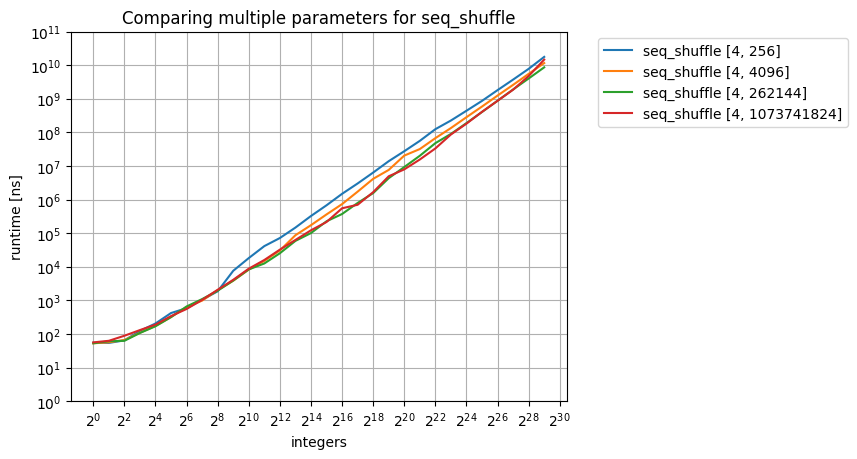

In [4]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 31, 2)]
ax_yticks = [10 ** i for i in range(0, 12, 1)]

# df_cpp_mean[(df_cpp_mean["buckets"] == 4) & (df_cpp_mean["threshold"] == 256)]
# df_cpp_mean.loc[(df_cpp_mean["buckets"] == 4) & (df_cpp_mean["threshold"] == 256)]
ax = df_cpp_mean.query("buckets == 4 & threshold == 256").plot(x="integers", y="duration [ns]", label="seq_shuffle [4, 256]")
df_cpp_mean.query("buckets == 4 & threshold == 4096").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle [4, 4096]")
df_cpp_mean.query("buckets == 4 & threshold == 262144").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle [4, 262144]")
df_cpp_mean.query("buckets == 4 & threshold == 1073741824").plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle [4, 1073741824]")

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
ax.set_yticks(ax_yticks)
ax.grid(True)
ax.set_xlabel("integers")
ax.set_ylabel("runtime [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("Comparing multiple parameters for seq_shuffle")

As the result above doesn't help us much, let's look into runtime per integer.

In [5]:
# We add a new column
df_cpp_mean["runtime per integer [ns]"] = df_cpp_mean["duration [ns]"] / df_cpp_mean["integers"]

Text(0.5, 1.0, 'Comparing multiple parameters for seq_shuffle')

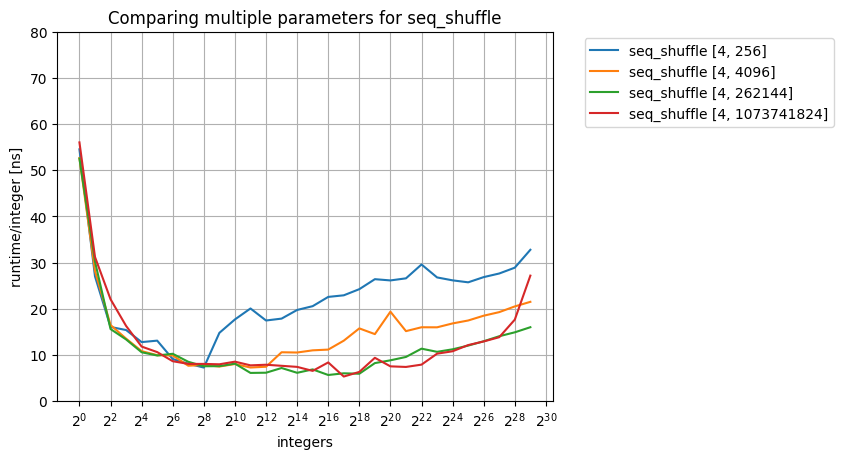

In [8]:
# We plot data
ax_2_xticks = ax_xticks
ax_2_yticks = [10 * i for i in range(0, 9, 1)]

ax_2 = df_cpp_mean.query("buckets == 4 & threshold == 256").plot(x="integers", y="runtime per integer [ns]", label="seq_shuffle [4, 256]")
df_cpp_mean.query("buckets == 4 & threshold == 4096").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle [4, 4096]")
df_cpp_mean.query("buckets == 4 & threshold == 262144").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle [4, 262144]")
df_cpp_mean.query("buckets == 4 & threshold == 1073741824").plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle [4, 1073741824]")

ax_2.set_xscale("log", base=2)
#ax_2.set_yscale("log", base=10)
ax_2.set_xticks(ax_2_xticks)
ax_2.set_yticks(ax_2_yticks)
ax_2.grid(True)
ax_2.set_xlabel("integers")
ax_2.set_ylabel("runtime/integer [ns]")
ax_2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax_2.set_title("Comparing multiple parameters for seq_shuffle")